# Exploring Dandiset 001354: Hippocampal Neuronal Responses to Programmable Antigen-Gated GPCR Activation

*This notebook was generated with the assistance of AI. Please exercise caution when interpreting the code or the results, and carefully check that data handling and visuals are suitable for your needs.*

## Overview

This notebook is designed to help researchers explore [Dandiset 001354 (version 0.250312.0036)](https://dandiarchive.org/dandiset/001354/0.250312.0036):

**Title:** Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Citation:**
> Klein, Peter (2025) Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation (Version 0.250312.0036) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001354/0.250312.0036

The dataset comprises single cell whole-cell current clamp recordings from mouse hippocampal CA1 neurons expressing programmable antigen-gated engineered GPCRs. The data are stored in the NWB (Neurodata Without Borders) format.

**Notebook Covers:**
- Required libraries
- How to connect to DANDI, list and select data files
- How to stream NWB files and load data for exploration
- Visualization of a few example electrophysiological traces and current stimuli
- Brief exploration of relevant metadata

## Required Packages

To run this notebook you need:
- `dandi` (DANDI API client)
- `remfile` (for remote file streaming)
- `h5py` (access HDF5/NWB file structures)
- `pynwb` (NWB loader)
- `matplotlib` (for visualization)

These packages are assumed to be already installed in your Python environment.

## 1. List Available Files and Assets in the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the specified Dandiset (version as in chat)
dandiset_id = "001354"
dandiset_version = "0.250312.0036"
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    # List the first few NWB asset filepaths
    asset_paths = [a.path for a in dandiset.get_assets()]
    print("Number of files in Dandiset:", len(asset_paths))
    print("First 5 file paths:")
    for p in asset_paths[:5]:
        print(" -", p)

Number of files in Dandiset: 50
First 5 file paths:
 - sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
 - sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
 - sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
 - sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
 - sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb


## 2. Load an NWB File by Streaming from the Remote Archive

The NWB files can be loaded directly by streaming—no download required.
In this example, we'll explore data from `sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb`.

In [2]:
import remfile
import h5py
import pynwb

select_relpath = "sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb"

# Use DANDI API to get download URL for the remote file
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    url = next(dandiset.get_assets_by_glob(select_relpath)).download_url

# Stream and open as an h5py file, load with pynwb
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## 3. Inspect Main Metadata Fields

Let's look at some of the most important metadata to contextualize the recording.

In [3]:
from pprint import pprint

print("NWB session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject info:")
print("  ID:", getattr(nwb.subject, 'subject_id', None))
print("  Sex:", getattr(nwb.subject, 'sex', None))
print("  Age reference:", getattr(nwb.subject, 'age__reference', None))
print("  Date of birth:", getattr(nwb.subject, 'date_of_birth', None))
print("  Species:", getattr(nwb.subject, 'species', None))
print("Targeted layer:", nwb.lab_meta_data["DandiIcephysMetadata"].targeted_layer)
print("File identifier:", nwb.identifier)
print("NWB file creation date:", nwb.file_create_date)
print("Source script:", nwb.source_script)

NWB session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 18:07:19-07:00
Subject info:
  ID: PK-109
  Sex: F
  Age reference: birth
  Date of birth: 2024-04-07 00:00:00-07:00
  Species: Mus musculus
Targeted layer: CA1
File identifier: pk2024_07_17_0009
NWB file creation date: [datetime.datetime(2025, 3, 7, 17, 42, 47, 161274, tzinfo=tzoffset(None, -28800))]
Source script: Created using NeuroConv v0.7.1


## 4. List Available Data Series

Each "CurrentClampSeries" contains a response to a stimulus protocol; here we briefly show the series available in `.acquisition` and `.stimulus`.

In [4]:
# List a few response and stimulus series
print("Number of acquisition (response) series:", len(nwb.acquisition))
print("First 5 acquisition keys:", list(nwb.acquisition.keys())[:5])
print("Number of stimulus series:", len(nwb.stimulus))
print("First 5 stimulus keys:", list(nwb.stimulus.keys())[:5])

Number of acquisition (response) series: 624
First 5 acquisition keys: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0']
Number of stimulus series: 624
First 5 stimulus keys: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0']


## 5. Visualize Example Traces

Let's plot several example traces from this experiment. We'll show:
- The current clamp stimulus (command current)
- The corresponding membrane potential response

We'll plot both channels for a given "sweep", for the first few sweeps.

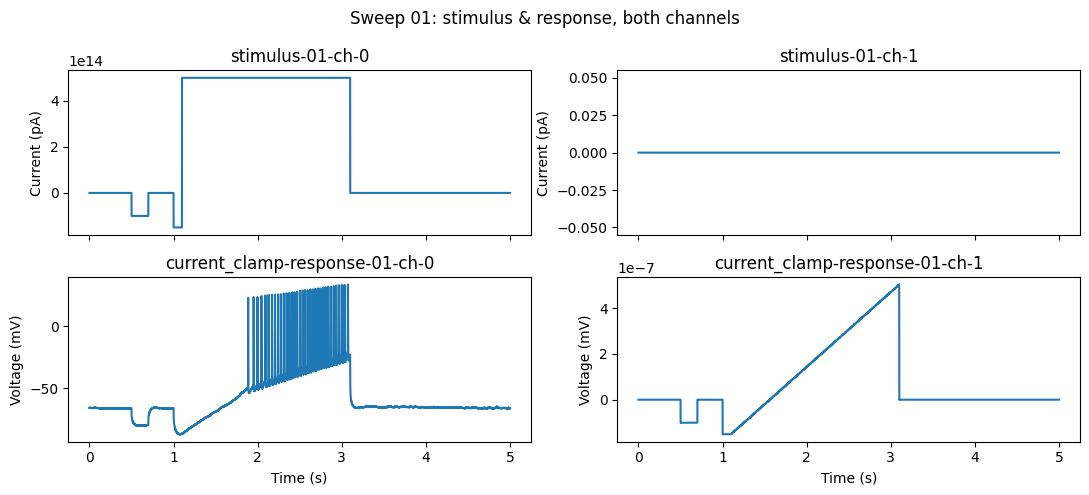

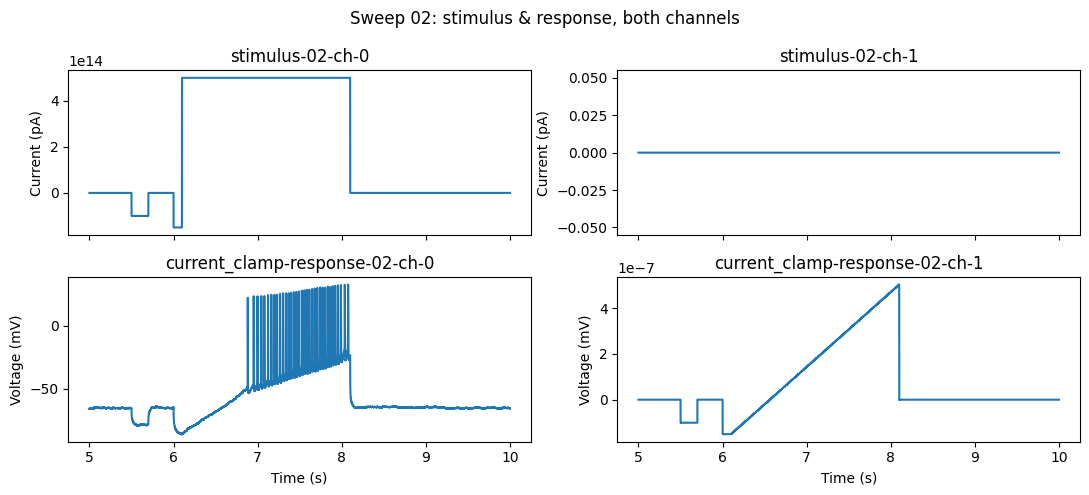

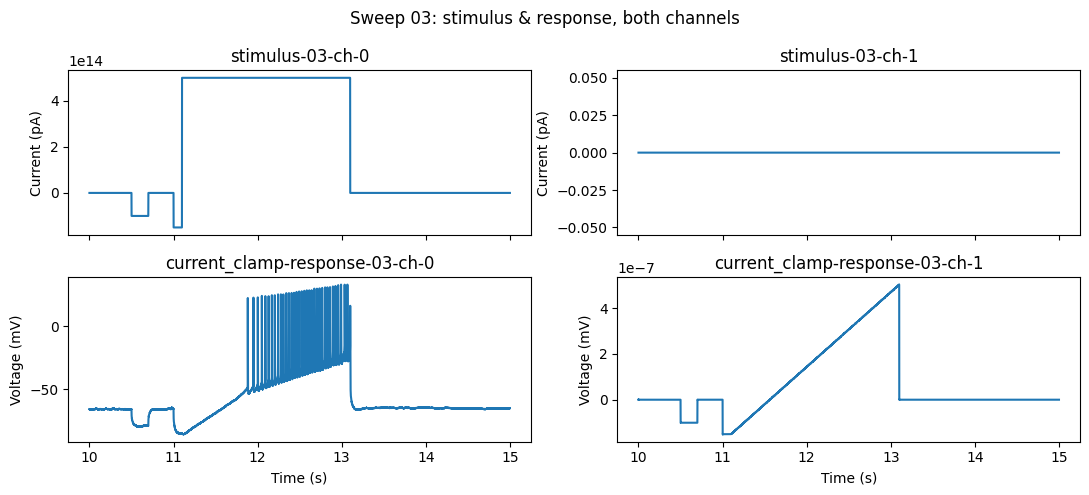

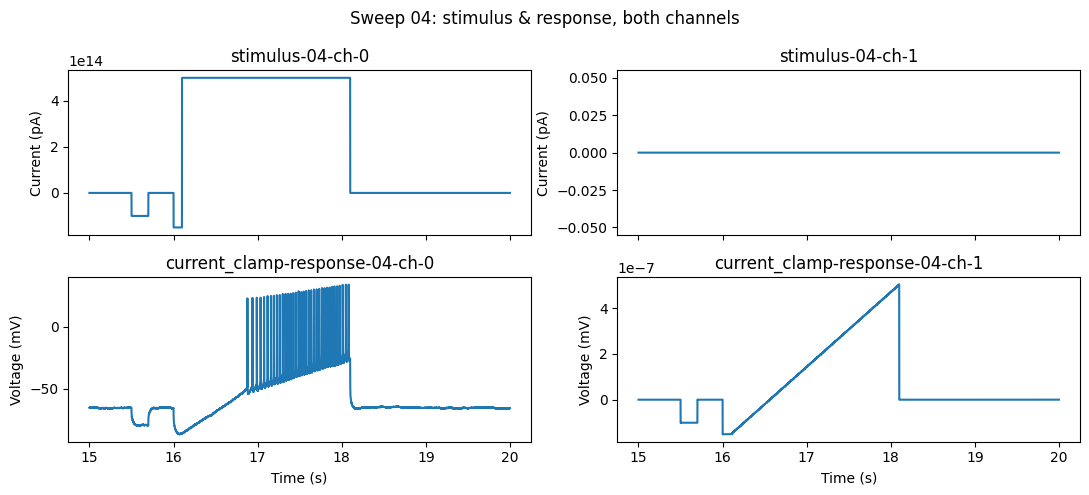

In [5]:
import matplotlib.pyplot as plt

# Helper to plot stimulus-response for a given sweep index
def plot_sweep(sweep_idx):
    stim_key_0 = f"stimulus-0{sweep_idx+1}-ch-0"
    stim_key_1 = f"stimulus-0{sweep_idx+1}-ch-1"
    resp_key_0 = f"current_clamp-response-0{sweep_idx+1}-ch-0"
    resp_key_1 = f"current_clamp-response-0{sweep_idx+1}-ch-1"
    
    # Get objects
    stim0 = nwb.stimulus[stim_key_0]
    stim1 = nwb.stimulus[stim_key_1]
    resp0 = nwb.acquisition[resp_key_0]
    resp1 = nwb.acquisition[resp_key_1]

    # Pull data for ch 0
    t0 = stim0.starting_time + (np.arange(stim0.data.shape[0]) / stim0.rate)
    t1 = stim1.starting_time + (np.arange(stim1.data.shape[0]) / stim1.rate)

    fig, axs = plt.subplots(2, 2, figsize=(11, 5), sharex='col')
    fig.suptitle(f"Sweep {sweep_idx+1:02d}: stimulus & response, both channels")
    
    # Channel 0
    axs[0,0].plot(t0, stim0.data[:]*1e12)  # show in pA
    axs[0,0].set_ylabel("Current (pA)")
    axs[0,0].set_title(stim_key_0)
    
    axs[1,0].plot(
        t0,
        resp0.data[:]*resp0.conversion*1e3
    )  # show in mV
    axs[1,0].set_xlabel("Time (s)")
    axs[1,0].set_ylabel("Voltage (mV)")
    axs[1,0].set_title(resp_key_0)

    # Channel 1
    axs[0,1].plot(t1, stim1.data[:]*1e12)
    axs[0,1].set_ylabel("Current (pA)")
    axs[0,1].set_title(stim_key_1)
    
    axs[1,1].plot(
        t1,
        resp1.data[:]*resp1.conversion*1e3
    )
    axs[1,1].set_xlabel("Time (s)")
    axs[1,1].set_ylabel("Voltage (mV)")
    axs[1,1].set_title(resp_key_1)

    plt.tight_layout()
    plt.show()

import numpy as np

# Plot sweeps 0, 1, 2, and 3 as demonstrators
for j in range(4):
    plot_sweep(j)

## 6. Explore Additional Sweeps and Metadata

The NWB file contains data from many more sweeps and can be programmatically explored. You can also convert the tables from `nwb.intracellular_recordings`, `nwb.icephys_simultaneous_recordings`, and `nwb.icephys_sequential_recordings` to Pandas DataFrames for batch analysis (e.g., nwb.intracellular_recordings.to_dataframe()).

See the DANDI documentation and NWB documentation for further ideas for reanalysis.

## References and Further Information

- [Dandiset 001354 on DANDI Archive](https://dandiarchive.org/dandiset/001354/0.250312.0036)
- [Related Nature Article](https://www.nature.com/articles/s41586-024-08282-3)
- [Neurodata Without Borders](https://www.nwb.org/)

---

*This notebook offers a starting point for streaming and exploring single-cell electrophysiology data from programmable, antigen-gated receptor experiments.*